## Classification:
* classifies the data into categories.

**When to regression and classification**
* If we have to predict the output then we will use the regression method
* If we have to classifiy the input into a category then we will go for classification.

### Logistic Regression:
* This is one of the classification model.
* The classification done using the binary values 0 and 1.
* The plot joining the 0 and 1 will be sigmoid curve or s-curve.

**important points to do considers while performing logistic regression:**
*  Logistic regression can be applied to the values which don't have multicolinearity(independent)
* This can be applied only for categorical variables.

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

**Linear Equation**:
<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning2.png">

**Logistic Equation between 0 and 1**:
<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning3.png">

**Logistic Regression between the range -infinity to infinity**:
<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning4.png">



**Types of Logistic regression**:
    * Binomial regression --- only two categories will be considered
    * Multinomial Regression --- more than 3 unordered categories
    * Ordinal Regression --- more than 3 ordered categories.

In [1]:
## importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### import the dataset:

data = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-5/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.notnull().sum().sum()

6912

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
## splitting of dataset:separating the input and output values.

Features_col =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[Features_col]
y = data["Outcome"]

In [27]:
x = data.drop(["Outcome"],axis = 1)
y = data["Outcome"]

In [47]:
## training and testing the model:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)


In [48]:
### importing Logistic Regression:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Niharikaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
help(lr)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

In [50]:
y_predict = lr.predict(X_test)

In [51]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
###  checking the accuracy of the model:

from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test,y_predict)
print("Confusion Matrix: ",c_matrix)

Confusion Matrix:  [[119  11]
 [ 26  36]]


In [54]:
### accuracy,precision,recall:

print("Accuracy :",metrics.accuracy_score(y_test,y_predict))
print("precision:",metrics.precision_score(y_test,y_predict))
print("recall:",metrics.recall_score(y_test,y_predict))

Accuracy : 0.8072916666666666
precision: 0.7659574468085106
recall: 0.5806451612903226


In [55]:
(119+36)/(119+11+26+36)

0.8072916666666666

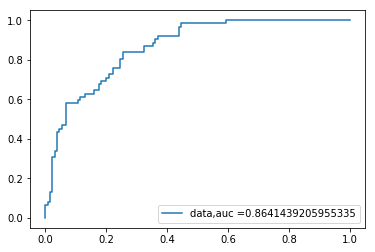

In [56]:
y_pre = lr.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pre)
a = metrics.roc_auc_score(y_test,y_pre)
plt.plot(fpr,tpr,label = "data,auc ="+str(a))
plt.legend(loc= "best")
plt.show()

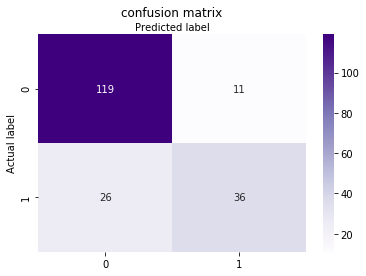

In [59]:
### plot for confusion matrix:

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(c_matrix),annot = True,cmap = "Purples",fmt = 'g')
ax.xaxis.set_label_position("top")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("confusion matrix")
plt.show()